# Lending Club Case Study

### Abstract & Contents

#### Introduction:
    Lending club is for two kind of people. Lenders and borrows. We are on lenders side. We are provided with data and we need to conduct EDA.

#### Business Understanding:
    To understand how consumer attributes and loan attributes influence the tendency of default. 

#### Data Overview :
    Data contains more than 100 variables/columns but, We are concerned about loan_status the target variable which contains 3 categories of loan status as {Fully paid, current and charged off}.
    
#### End Goal/Objective :
    Loan approvals will be based on analysis conducted. So every hint and variable matters. This EDA eases application process even before it is shown to lender. Applications will be filtered in minutes and loan status will be predicted in real time.     
    
    Results expected:
        - Crucial hints that will help lendor
        - variable that help predicting loan likelihood of getting deafult
        - categorical analysis showing plots and important data in a PDF
    
#### Milestones :
    1. Data understading
    2. Preprocessing 
        - Basic cleaning 
        - Manual cleaning - Imparting domain knowledge
        - Splitting Variables if required
    3. Univariate Analysis
        - Target Variable
        - Numerical
        - Categorical
    4. Bivariate Analysis 
        - Finding correlations
    5. Extracting insights
    
-----------------------------------------------------------------------
Note:
In second iteration check for 
mths_since_last_delinq removed by 50% missing data criteria
emp_title removed 
zip code removed
- last_pymnt_d - Last month payment was received
- last_pymnt_amnt - Last total payment amount received

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations

#### Loading datasets

In [2]:
loan_data=pd.read_csv('loan.csv',low_memory=False)

## 1. Data Understanding

In [3]:
loan_data.shape

(39717, 111)

In [4]:
all_columns = loan_data.columns
print("Total number of columns at the start "+str(len(all_columns)))

Total number of columns at the start 111


In [5]:
#Getting an understanding of the first 5 columns 
loan_data[all_columns[:5]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 5 columns):
id                 39717 non-null int64
member_id          39717 non-null int64
loan_amnt          39717 non-null int64
funded_amnt        39717 non-null int64
funded_amnt_inv    39717 non-null float64
dtypes: float64(1), int64(4)
memory usage: 1.5 MB


In [6]:
print("loan status tells us loan is defaulted or not-------")
loan_data.loan_status.value_counts()

loan status tells us loan is defaulted or not-------


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [7]:
#Checking for missing values
missing_data=round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
missing_data[missing_data != 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [8]:
#how many columns have all null
all_null_columns=missing_data[missing_data == 100].index
print("Number of columns having all null values :"+str(len(all_null_columns)))

Number of columns having all null values :54


In [9]:
#how many columns have constant value
all_constant_columns=loan_data.columns[loan_data.nunique()==1]
print("Number of columns having only constant values are "+str(len(all_constant_columns)))

Number of columns having only constant values are 9


## 2. Preprocessing & Cleaning

### 2.1 Basic Cleaning

In [10]:
# removing columns where every entry is null
print("Dropping following columns :")
print(all_null_columns.values)
loan_data=loan_data.drop(all_null_columns,axis=1)
print("\nData shape after removing null columns",loan_data.shape)

Dropping following columns :
['mths_since_last_major_derog' 'annual_inc_joint' 'dti_joint'
 'verification_status_joint' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m'
 'open_il_6m' 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il'
 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m' 'max_bal_bc'
 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl' 'inq_last_12m'
 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy' 'bc_util'
 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op'
 'mo_sin_rcnt_tl' 'mort_acc' 'mths_since_recent_bc'
 'mths_since_recent_bc_dlq' 'mths_since_recent_inq'
 'mths_since_recent_revol_delinq' 'num_accts_ever_120_pd' 'num_actv_bc_tl'
 'num_actv_rev_tl' 'num_bc_sats' 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl'
 'num_rev_accts' 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_120dpd_2m'
 'num_tl_30dpd' 'num_tl_90g_dpd_24m' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'
 'percent_bc_gt_75' 'tot_hi_cred_lim' 'total_bal_ex_mort' 'total_bc_limit'
 'total_il_high_credit_limit']

D

In [11]:
#removing columns having constant value throughout (i.e. variance = 0)
print("Dropping following columns :")
print(all_constant_columns.values)

loan_data=loan_data.drop(all_constant_columns,axis=1)
print("\nData shape after removing null columns",loan_data.shape)

Dropping following columns :
['pymnt_plan' 'initial_list_status' 'collections_12_mths_ex_med'
 'policy_code' 'application_type' 'acc_now_delinq'
 'chargeoff_within_12_mths' 'delinq_amnt' 'tax_liens']

Data shape after removing null columns (39717, 48)


In [12]:
#let's check % of null values in remaining columns
missing_data=round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
missing_data[missing_data != 0]

emp_title                  6.19
emp_length                 2.71
desc                      32.58
title                      0.03
mths_since_last_delinq    64.66
mths_since_last_record    92.99
revol_util                 0.13
last_pymnt_d               0.18
next_pymnt_d              97.13
last_credit_pull_d         0.01
pub_rec_bankruptcies       1.75
dtype: float64

In [13]:
# dropping columns where missing percentage > 50%
missing_gt_50 = missing_data[missing_data >= 50].index
print("Removing the following columns:")
print(missing_gt_50.values)
loan_data=loan_data.drop(missing_gt_50,axis=1)

Removing the following columns:
['mths_since_last_delinq' 'mths_since_last_record' 'next_pymnt_d']


In [14]:
# Looking at rows
ctr = Counter(loan_data.isnull().sum(axis=1).values)
sorted(ctr.items())

[(0, 24408), (1, 13757), (2, 1111), (3, 438), (4, 3)]

##### From above output, we can see that maximum missing value per row is 4. So, we will not impute any value rowwise, we'll look at columnwise imputation soon.

### 2.2 Manual cleaning - Imparting domain knowledge

In [15]:
loan_data.describe().transpose().sort_values(by='std')

count           mean            std       min  \
pub_rec_bankruptcies     39020.0       0.043260       0.204324      0.00   
pub_rec                  39717.0       0.055065       0.237200      0.00   
delinq_2yrs              39717.0       0.146512       0.491812      0.00   
inq_last_6mths           39717.0       0.869200       1.070219      0.00   
open_acc                 39717.0       9.294408       4.400282      2.00   
dti                      39717.0      13.315130       6.678594      0.00   
total_rec_late_fee       39717.0       1.363015       7.289979      0.00   
total_acc                39717.0      22.088828      11.401709      2.00   
collection_recovery_fee  39717.0      12.406112     148.671593      0.00   
installment              39717.0     324.561922     208.874874     15.69   
out_prncp_inv            39717.0      50.989768     373.824457      0.00   
out_prncp                39717.0      51.227887     375.172839      0.00   
recoveries               39717.0      95.221624     688.744771      0.00   
total_rec_int            39717.0    2263.663172    2608.111964      0.00   
last_pymnt_amnt          39717.0    2678.826162    4447.136012      0.00   
total_rec_prncp          39717.0    9793.348813    7065.522127      0.00   
funded_amnt_inv          39717.0   10397.448868    7128.450439      0.00   
funded_amnt              39717.0   10947.713196    7187.238670    500.00   
loan_amnt                39717.0   11219.443815    7456.670694    500.00   
total_pymnt_inv          39717.0   11567.149118    8942.672613      0.00   
total_pymnt              39717.0   12153.596544    9042.040766      0.00   
revol_bal                39717.0   13382.528086   15885.016641      0.00   
annual_inc               39717.0   68968.926377   63793.765790   4000.00   
id                       39717.0  683131.913060  210694.132915  54734.00   
member_id                39717.0  850463.559408  265678.307421  70699.00   

                               25%            50%           75%           max  
pub_rec_bankruptcies          0.00       0.000000  0.000000e+00  2.000000e+00  
pub_rec                       0.00       0.000000  0.000000e+00  4.000000e+00  
delinq_2yrs                   0.00       0.000000  0.000000e+00  1.100000e+01  
inq_last_6mths                0.00       1.000000  1.000000e+00  8.000000e+00  
open_acc                      6.00       9.000000  1.200000e+01  4.400000e+01  
dti                           8.17      13.400000  1.860000e+01  2.999000e+01  
total_rec_late_fee            0.00       0.000000  0.000000e+00  1.802000e+02  
total_acc                    13.00      20.000000  2.900000e+01  9.000000e+01  
collection_recovery_fee       0.00       0.000000  0.000000e+00  7.002190e+03  
installment                 167.02     280.220000  4.307800e+02  1.305190e+03  
out_prncp_inv                 0.00       0.000000  0.000000e+00  6.307370e+03  
out_prncp                     0.00       0.000000  0.000000e+00  6.311470e+03  
recoveries                    0.00       0.000000  0.000000e+00  2.962335e+04  
total_rec_int               662.18    1348.910000  2.833400e+03  2.356368e+04  
last_pymnt_amnt             218.68     546.140000  3.293160e+03  3.611520e+04  
total_rec_prncp            4600.00    8000.000000  1.365326e+04  3.500002e+04  
funded_amnt_inv            5000.00    8975.000000  1.440000e+04  3.500000e+04  
funded_amnt                5400.00    9600.000000  1.500000e+04  3.500000e+04  
loan_amnt                  5500.00   10000.000000  1.500000e+04  3.500000e+04  
total_pymnt_inv            5112.31    9287.150000  1.579881e+04  5.856368e+04  
total_pymnt                5576.93    9899.640319  1.653443e+04  5.856368e+04  
revol_bal                  3703.00    8850.000000  1.705800e+04  1.495880e+05  
annual_inc                40404.00   59000.000000  8.230000e+04  6.000000e+06  
id                       516221.00  665665.000000  8.377550e+05  1.077501e+06  
member_id                666780.00  850812.000000 

#### After extensive data swimming, we'll drop following columns

In [16]:
# id column is just random it never decides the outcome
loan_data=loan_data.drop('id',axis=1)

# member_id column is same as id, so we will drop that
loan_data=loan_data.drop('member_id',axis=1)

# desc column is long and doesn't contain significance in predicting outcome
loan_data=loan_data.drop('desc',axis=1)

# column emp_title doesn't provide any significance to predicting 
loan_data=loan_data.drop('emp_title',axis=1)

# url column is just random variable url never decide defaulter
loan_data=loan_data.drop('url',axis=1)

#title columns contains few thousands of unique values, so can't be categorized
loan_data=loan_data.drop('title',axis=1)

# Zip code is given nnnXXX format and not particular 
loan_data=loan_data.drop('zip_code',axis=1)

#### Removing the following columns because it leaks data from the future, i.e information only present after the loan is already funded or has already ended by either charge off or has been fully paid

- out_prncp - Remaining outstanding principal for total amount funded
- out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
- recoveries - post charge off gross recovery
- total_pymnt - Payments received to date for total amount funded
- total_pymnt_inv - Payments received to date for portion of total amount funded by investors
- total_rec_int - Interest received to date
- total_rec_late_fee - Late fees received to date
- total_rec_prncp - Principal received to date
- collection_recovery_fee - post charge off collection fee
- last_pymnt_d - Last month payment was received
- last_pymnt_amnt - Last total payment amount received


In [17]:
columns_to_remove=['out_prncp','out_prncp_inv','recoveries','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
loan_data = loan_data.drop(columns_to_remove, axis=1)
print(loan_data.shape)

(39717, 27)


In [18]:
#let's check % of null values in remaining columns
missing_data=round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
missing_data[missing_data != 0]

emp_length              2.71
revol_util              0.13
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [19]:
#as we have very low % of missing value rows, we will drop these rows
loan_data=loan_data[~loan_data.emp_length.isnull()]
loan_data=loan_data[~loan_data.pub_rec_bankruptcies.isnull()]
loan_data=loan_data[~loan_data.revol_util.isnull()]
loan_data=loan_data[~loan_data.last_credit_pull_d.isnull()]

In [20]:
loan_data.shape

(37897, 27)

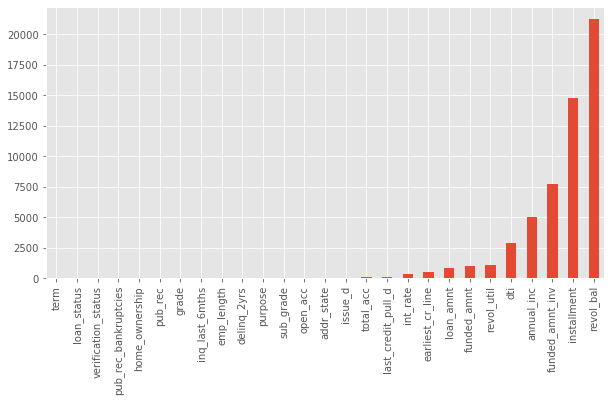

In [21]:
plt.figure(figsize=(10,5))
loan_data.nunique().sort_values().plot.bar()

In [22]:
#for quick reference we take object and numeric columns into a list
dtype_obj=loan_data.loc[:, loan_data.dtypes == object].columns
dtype_obj.drop('last_credit_pull_d')
dtype_float=loan_data.loc[:, (loan_data.dtypes == np.float64) | (loan_data.dtypes == int)].columns

In [23]:
print("columns with numerical entries :\n")
loan_data[dtype_float].nunique().sort_values()

columns with numerical entries :



pub_rec_bankruptcies        3
dti                      2863
annual_inc               5032
funded_amnt_inv          7748
installment             14736
dtype: int64

In [24]:
print("columns with string and date entries :\n")
loan_data[dtype_obj].nunique().sort_values()

columns with string and date entries :



term                      2
verification_status       3
loan_status               3
home_ownership            4
grade                     7
emp_length               11
purpose                  14
sub_grade                35
addr_state               49
issue_d                  52
last_credit_pull_d       97
int_rate                337
earliest_cr_line        514
revol_util             1087
dtype: int64

## Target Variable Cleaning

In [25]:
#unique values & count
loan_data['loan_status'].value_counts()

Fully Paid     31534
Charged Off     5265
Current         1098
Name: loan_status, dtype: int64

In [26]:
# dropping rows loan status is current and converting it into binary data
loan_data=loan_data[loan_data.loan_status!='Current']
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: pd.to_numeric(x))

In [27]:
loan_data.loan_status

0        0
1        1
2        0
3        0
5        0
        ..
39562    0
39573    0
39623    1
39666    1
39680    0
Name: loan_status, Length: 36799, dtype: int64

In [28]:
print(loan_data.shape)
loan_data.head(3)

(36799, 27)


loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   

  grade sub_grade emp_length home_ownership  ...  delinq_2yrs  \
0     B        B2  10+ years           RENT  ...            0   
1     C        C4   < 1 year           RENT  ...            0   
2     C        C5  10+ years           RENT  ...            0   

  earliest_cr_line inq_last_6mths  open_acc pub_rec revol_bal  revol_util  \
0           Jan-85              1         3       0     13648      83.70%   
1           Apr-99              5         3       0      1687       9.40%   
2           Nov-01              2         2       0      2956      98.50%   

   total_acc last_credit_pull_d  pub_rec_bankruptcies  
0          9             May-16                   0.0  
1          4             Sep-13                   0.0  
2         10             May-16                   0.0  

[3 rows x 27 columns]

#### Numerical Variables 

In [29]:
loan_data[dtype_float].head()

funded_amnt_inv  installment  annual_inc    dti  pub_rec_bankruptcies
0           4975.0       162.87     24000.0  27.65                   0.0
1           2500.0        59.83     30000.0   1.00                   0.0
2           2400.0        84.33     12252.0   8.72                   0.0
3          10000.0       339.31     49200.0  20.00                   0.0
5           5000.0       156.46     36000.0  11.20                   0.0

#### Object datatype variables/Categorical

In [30]:
print("List of object or Categorical columns including date: \n")
print(dtype_obj.values)

List of object or Categorical columns including date: 

['term' 'int_rate' 'grade' 'sub_grade' 'emp_length' 'home_ownership'
 'verification_status' 'issue_d' 'loan_status' 'purpose' 'addr_state'
 'earliest_cr_line' 'revol_util' 'last_credit_pull_d']


In [31]:
date_cols=['issue_d','earliest_cr_line','last_credit_pull_d']
loan_data[date_cols].head()

issue_d earliest_cr_line last_credit_pull_d
0  Dec-11           Jan-85             May-16
1  Dec-11           Apr-99             Sep-13
2  Dec-11           Nov-01             May-16
3  Dec-11           Feb-96             Apr-16
5  Dec-11           Nov-04             Jan-16

In [32]:
#lets clean the date columns 
loan_data.last_credit_pull_d = pd.to_datetime(loan_data.last_credit_pull_d, format='%b-%y')
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data.earliest_cr_line = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
loan_data[date_cols].head()

issue_d earliest_cr_line last_credit_pull_d
0 2011-12-01       1985-01-01         2016-05-01
1 2011-12-01       1999-04-01         2013-09-01
2 2011-12-01       2001-11-01         2016-05-01
3 2011-12-01       1996-02-01         2016-04-01
5 2011-12-01       2004-11-01         2016-01-01

In [33]:
# lets clean the columns where % is present 
loan_data.int_rate = loan_data['int_rate'].str.strip('%').astype('float')
loan_data.revol_util= loan_data['revol_util'].str.strip('%').astype('float')
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
5       5000         5000           5000.0   36 months      7.90       156.46   

  grade sub_grade emp_length home_ownership  ...  delinq_2yrs  \
0     B        B2  10+ years           RENT  ...            0   
1     C        C4   < 1 year           RENT  ...            0   
2     C        C5  10+ years           RENT  ...            0   
3     C        C1  10+ years           RENT  ...            0   
5     A        A4    3 years           RENT  ...            0   

  earliest_cr_line inq_last_6mths  open_acc pub_rec revol_bal  revol_util  \
0       1985-01-01              1         3       0     13648        83.7   
1       1999-04-01              5         3       0      1687         9.4   
2       2001-11-01              2         2       0      2956        98.5   
3       1996-02-01              1        10       0      5598        21.0   
5       2004-11-01              3         9       0      7963        28.3   

   total_acc last_credit_pull_d  pub_rec_bankruptcies  
0          9         2016-05-01                   0.0  
1          4         2013-09-01                   0.0  
2         10         2016-05-01                   0.0  
3         37         2016-04-01                   0.0  
5         12         2016-01-01                   0.0  

[5 rows x 27 columns]

In [34]:
#Lets investigate the employment length
loan_data['emp_length'].value_counts()

10+ years    8368
< 1 year     4329
2 years      4202
3 years      3947
4 years      3290
5 years      3156
1 year       3071
6 years      2133
7 years      1686
8 years      1408
9 years      1209
Name: emp_length, dtype: int64

In [35]:
#Function to convert employment length into ordinal variables
def convert_emp_length(x):
    if '<' in x:
        return 0
    elif '+' in x:
        return 10
    return int(re.findall(r'\d+',x.split()[:-1][-1])[0])

#tests
print(convert_emp_length('< 1 year'))
print(convert_emp_length('1 year'))
print(convert_emp_length('4 year'))
print(convert_emp_length('10+ year'))

0
1
4
10


In [36]:
# Converting emp_length data to ordinal variables
loan_data.emp_length=loan_data.emp_length.apply(lambda x:convert_emp_length(x))
loan_data.emp_length.head()

0    10
1     0
2    10
3    10
5     3
Name: emp_length, dtype: int64

In [37]:
# Converting term to ordinal variable
loan_data['term'] = loan_data.term.apply(lambda x: x.split()[0])

In [38]:
#lets fix date columns
# considering years and ignoring months for last credit line column
loan_data.earliest_cr_line=loan_data.earliest_cr_line.dt.year

In [39]:
#Some of the years are greater than 2011 and that is happening because python converted 68 to 2068
loan_data.earliest_cr_line[loan_data.earliest_cr_line>2011].head()

1764    2068
3274    2067
3349    2065
3403    2067
3595    2067
Name: earliest_cr_line, dtype: int64

In [40]:
#Lets fix this issue error by converting such years back to 1900s dates
loan_data['earliest_cr_line']=loan_data.earliest_cr_line.apply(lambda x:x if x<2011 else x-100)

In [41]:
#Some of the years are greater than 2011 and that is happening because python converted 68 to 2068
loan_data.earliest_cr_line[loan_data.earliest_cr_line>2011].head()

Series([], Name: earliest_cr_line, dtype: int64)

In [42]:
loan_data['issued_month']=loan_data.issue_d.dt.month
loan_data.issue_d=loan_data.issue_d.dt.year

In [43]:
loan_data[dtype_obj].head()

term  int_rate grade sub_grade  emp_length home_ownership  \
0   36     10.65     B        B2          10           RENT   
1   60     15.27     C        C4           0           RENT   
2   36     15.96     C        C5          10           RENT   
3   36     13.49     C        C1          10           RENT   
5   36      7.90     A        A4           3           RENT   

  verification_status  issue_d  loan_status         purpose addr_state  \
0            Verified     2011            0     credit_card         AZ   
1     Source Verified     2011            1             car         GA   
2        Not Verified     2011            0  small_business         IL   
3     Source Verified     2011            0           other         CA   
5     Source Verified     2011            0         wedding         AZ   

   earliest_cr_line  revol_util last_credit_pull_d  
0              1985        83.7         2016-05-01  
1              1999         9.4         2013-09-01  
2              2001        98.5         2016-05-01  
3              1996        21.0         2016-04-01  
5              2004        28.3         2016-01-01

In [44]:
to_be_removed = ['delinq_2yrs','revol_bal','revol_util'] #Not present vars while approval
loan_data = loan_data.drop(to_be_removed, axis=1)
print(loan_data.shape)

(36799, 25)


In [45]:
dtype_obj

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'earliest_cr_line', 'revol_util',
       'last_credit_pull_d'],
      dtype='object')

In [46]:
dtype_obj = list(dtype_obj)
dtype_obj.remove('revol_util')

In [47]:
dtype_obj

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'last_credit_pull_d']

## 3. Univariate Analysis

In [48]:
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  installment grade  \
0       5000         5000           4975.0   36     10.65       162.87     B   
1       2500         2500           2500.0   60     15.27        59.83     C   
2       2400         2400           2400.0   36     15.96        84.33     C   
3      10000        10000          10000.0   36     13.49       339.31     C   
5       5000         5000           5000.0   36      7.90       156.46     A   

  sub_grade  emp_length home_ownership  ...  addr_state    dti  \
0        B2          10           RENT  ...          AZ  27.65   
1        C4           0           RENT  ...          GA   1.00   
2        C5          10           RENT  ...          IL   8.72   
3        C1          10           RENT  ...          CA  20.00   
5        A4           3           RENT  ...          AZ  11.20   

   earliest_cr_line  inq_last_6mths open_acc pub_rec  total_acc  \
0              1985               1        3       0          9   
1              1999               5        3       0          4   
2              2001               2        2       0         10   
3              1996               1       10       0         37   
5              2004               3        9       0         12   

   last_credit_pull_d  pub_rec_bankruptcies  issued_month  
0          2016-05-01                   0.0            12  
1          2013-09-01                   0.0            12  
2          2016-05-01                   0.0            12  
3          2016-04-01                   0.0            12  
5          2016-01-01                   0.0            12  

[5 rows x 25 columns]

### 3.1 Target Var : Loan Status

dict_items([(0, 31534), (1, 5265)]) [85.69254599309764, 14.307454006902361]


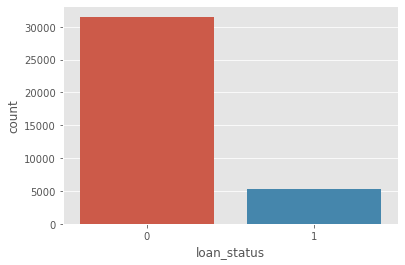

In [49]:
items = Counter(loan_data['loan_status'].values).items()
percentages = [100*i[1]/loan_data.shape[0] for i in items]
print(items, percentages)
sns.countplot(loan_data['loan_status'])

In [50]:
#Lets start by understanding the target variable loan_status
print("Of all the loans approved and have ended {}% became bad loans".format(int(np.sum(loan_data.loan_status)/len(loan_data.index)*100)))

Of all the loans approved and have ended 14% became bad loans


### 3.2 Numerical Variable

In [51]:
#all numerical vars
dtype_float

Index(['funded_amnt_inv', 'installment', 'annual_inc', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

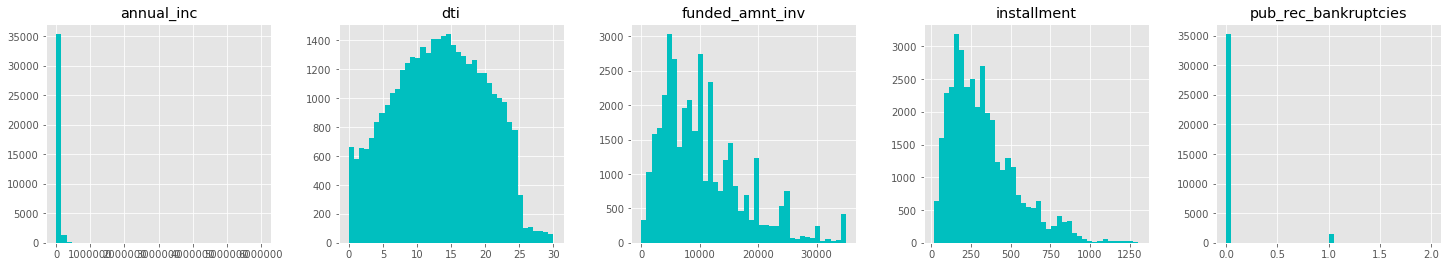

In [52]:
# single plot
loan_data[dtype_float].hist(bins=40,figsize=(25,25), layout=(5,5),color='c');

count    36799.000000
mean     10439.203649
std       7008.560754
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14350.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


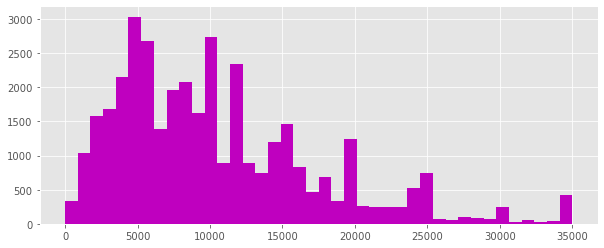

In [53]:
#Looking at them one by one
print(loan_data[dtype_float[0]].describe())
loan_data[dtype_float[0]].hist(bins=40,figsize=(10,4),color='m');

#### As above plot is slightly right skewed, let's check some transformations

In [54]:
def log_transform(x):
    if x==0:
        x = 0.00001
    return np.log10(x)

def min_max_scaling(df, column_name):
    min_,max_ = df[column_name].min(),df[column_name].max()
    temp_df = df[column_name].apply(lambda x:(x-min_)/(max_-min_))
    return temp_df
    
# loan_data[dtype_float[0]].apply(lambda x:log_transform(x)).hist(bins=40,figsize=(10,4),color='m');
# min_max_scaling(loan_data,dtype_float[0]).hist(bins=40,figsize=(10,4),color='m');

#We'll use these transformations later if required

count    36799.000000
mean       324.910910
std        208.893133
min         16.080000
25%        167.730000
50%        280.130000
75%        429.380000
max       1305.190000
Name: installment, dtype: float64


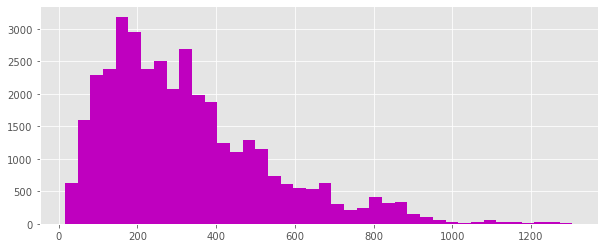

In [55]:
print(loan_data[dtype_float[1]].describe())
loan_data[dtype_float[1]].hist(bins=40,figsize=(10,4),color='m');

#### As above plot is slightly right skewed, similar actions as above hold true for this also

count    3.679900e+04
mean     6.943376e+04
std      6.402231e+04
min      4.000000e+03
25%      4.113000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


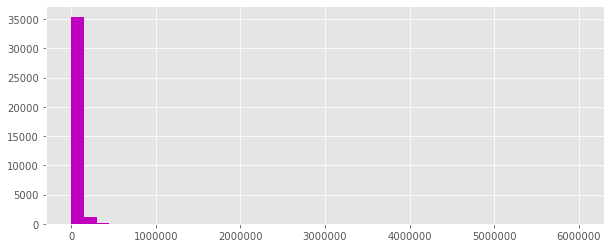

In [56]:
print(loan_data[dtype_float[2]].describe())
loan_data[dtype_float[2]].hist(bins=40,figsize=(10,4),color='m');

#### Clearly, outliers are present in this column('annual income'), but we won't remove them. Because, this distribution is as expected in real life. i.e. Number of people having higher income is lower than that of lower income.

count    36799.000000
mean        13.334781
std          6.650068
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64


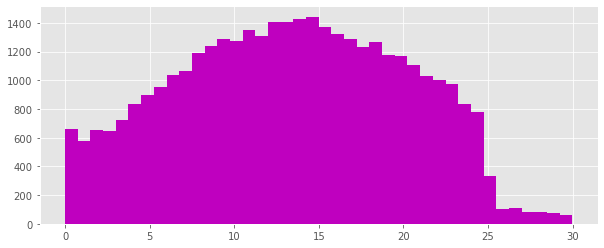

In [57]:
print(loan_data[dtype_float[3]].describe())
loan_data[dtype_float[3]].hist(bins=40,figsize=(10,4),color='m');

#### Almost normally distributed, need to investigate why right tail has lower frequencies.

## 3.3 Categorical Vars

In [58]:
dtype_obj

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'last_credit_pull_d']

In [59]:
loan_data[dtype_obj].head()

term  int_rate grade sub_grade  emp_length home_ownership  \
0   36     10.65     B        B2          10           RENT   
1   60     15.27     C        C4           0           RENT   
2   36     15.96     C        C5          10           RENT   
3   36     13.49     C        C1          10           RENT   
5   36      7.90     A        A4           3           RENT   

  verification_status  issue_d  loan_status         purpose addr_state  \
0            Verified     2011            0     credit_card         AZ   
1     Source Verified     2011            1             car         GA   
2        Not Verified     2011            0  small_business         IL   
3     Source Verified     2011            0           other         CA   
5     Source Verified     2011            0         wedding         AZ   

   earliest_cr_line last_credit_pull_d  
0              1985         2016-05-01  
1              1999         2013-09-01  
2              2001         2016-05-01  
3              1996         2016-04-01  
5              2004         2016-01-01

In [61]:
def count_plot_util(df,cat_var_name,target_var_name='loan_status'):
    #Remember one of our lambdas ==> (lambda x: 0 if x=='Fully Paid' else 1)
    try:
        default_rate = (loan_data.groupby(cat_var_name).sum()[target_var_name])/(loan_data.groupby(cat_var_name).count()[target_var_name])
        default_rate.plot.bar(color='g')
        plt.ylabel('Default Rate')
        plt.show()
    except: 
        return '_ERROR'#-1 #Error
    return '_SUCCESSFUL'#1 #successful


def count_plot_util2(df,cat_var_name,target_var_name='loan_status'):
    #Remember one of our lambdas ==> (lambda x: 0 if x=='Fully Paid' else 1)
    default_rate = (loan_data.groupby(cat_var_name).sum()[target_var_name])/(loan_data.groupby(cat_var_name).count()[target_var_name])
    return default_rate

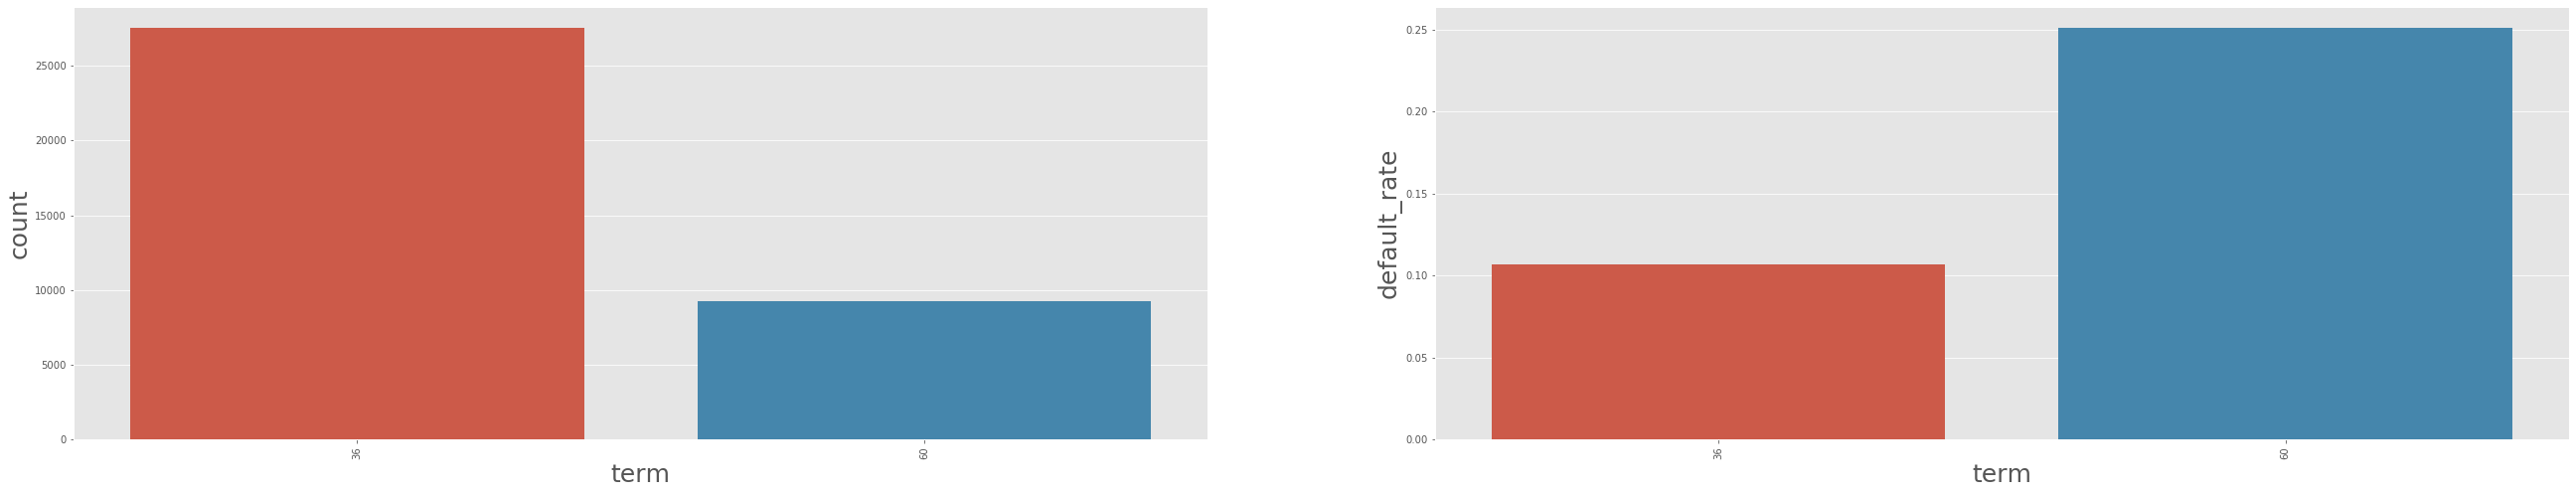

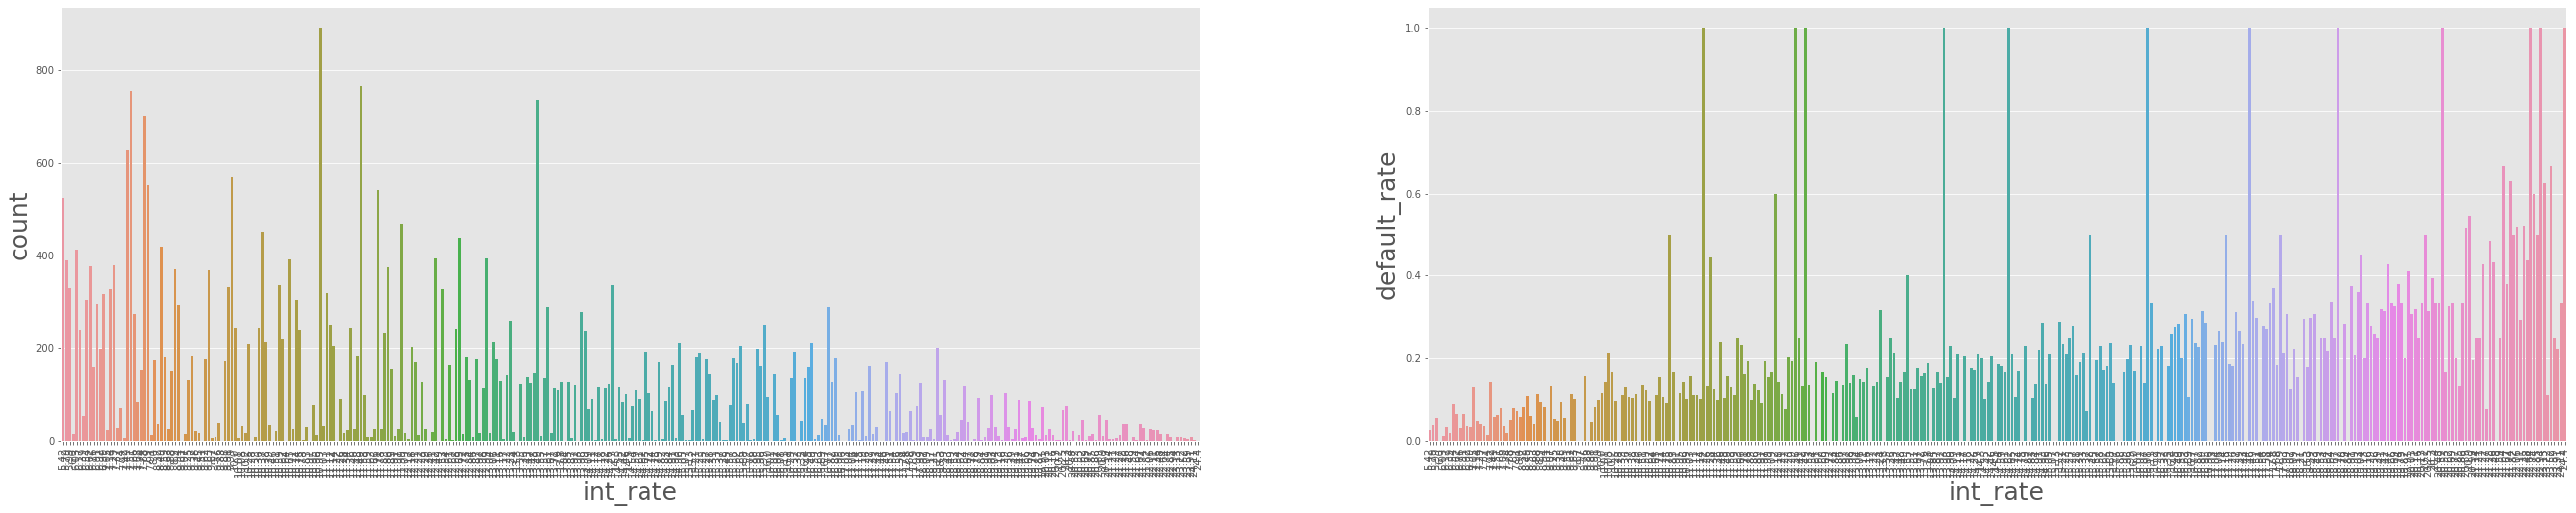

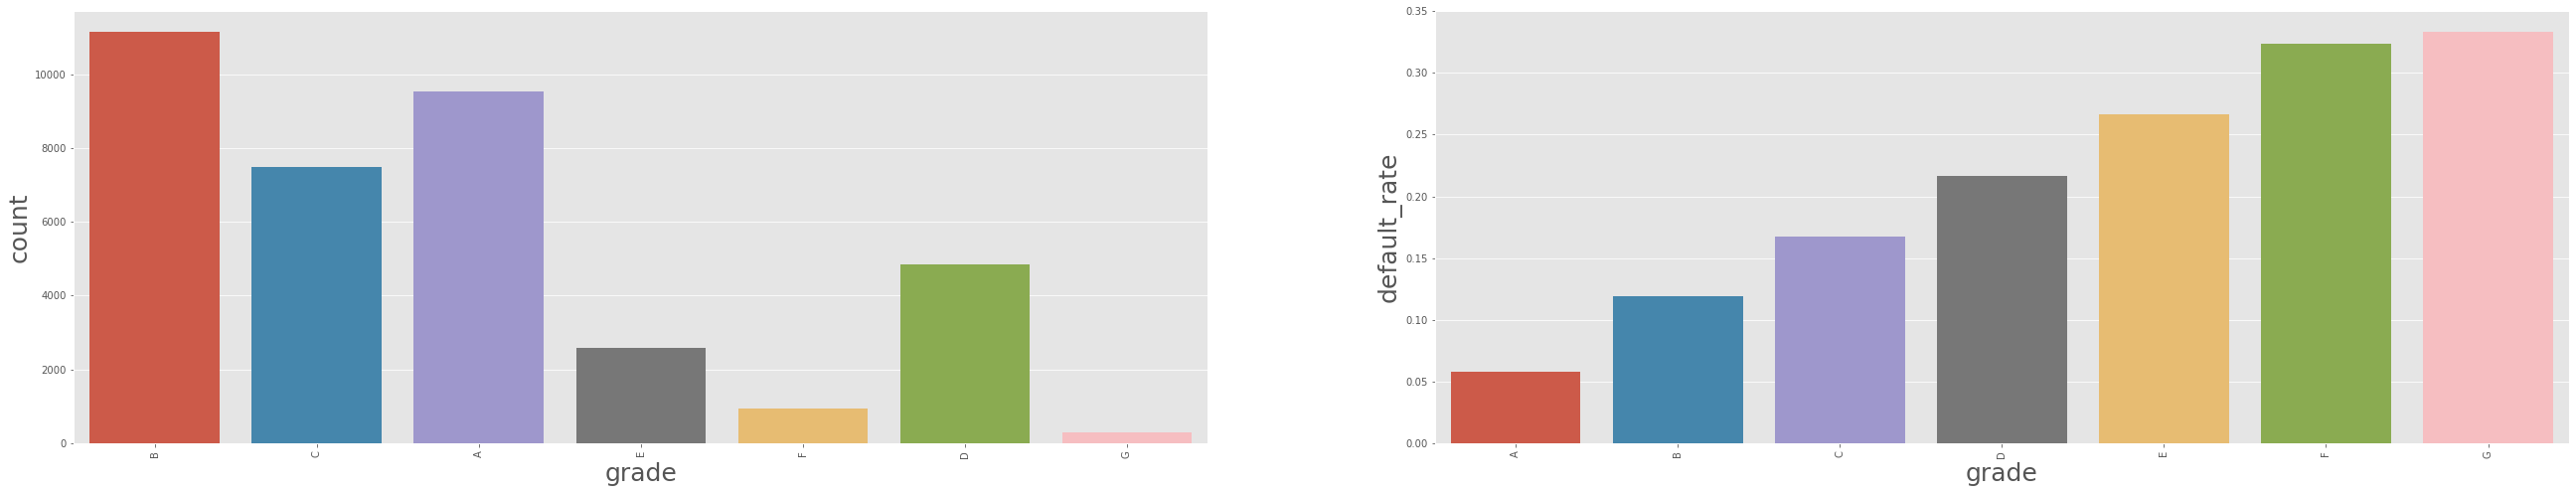

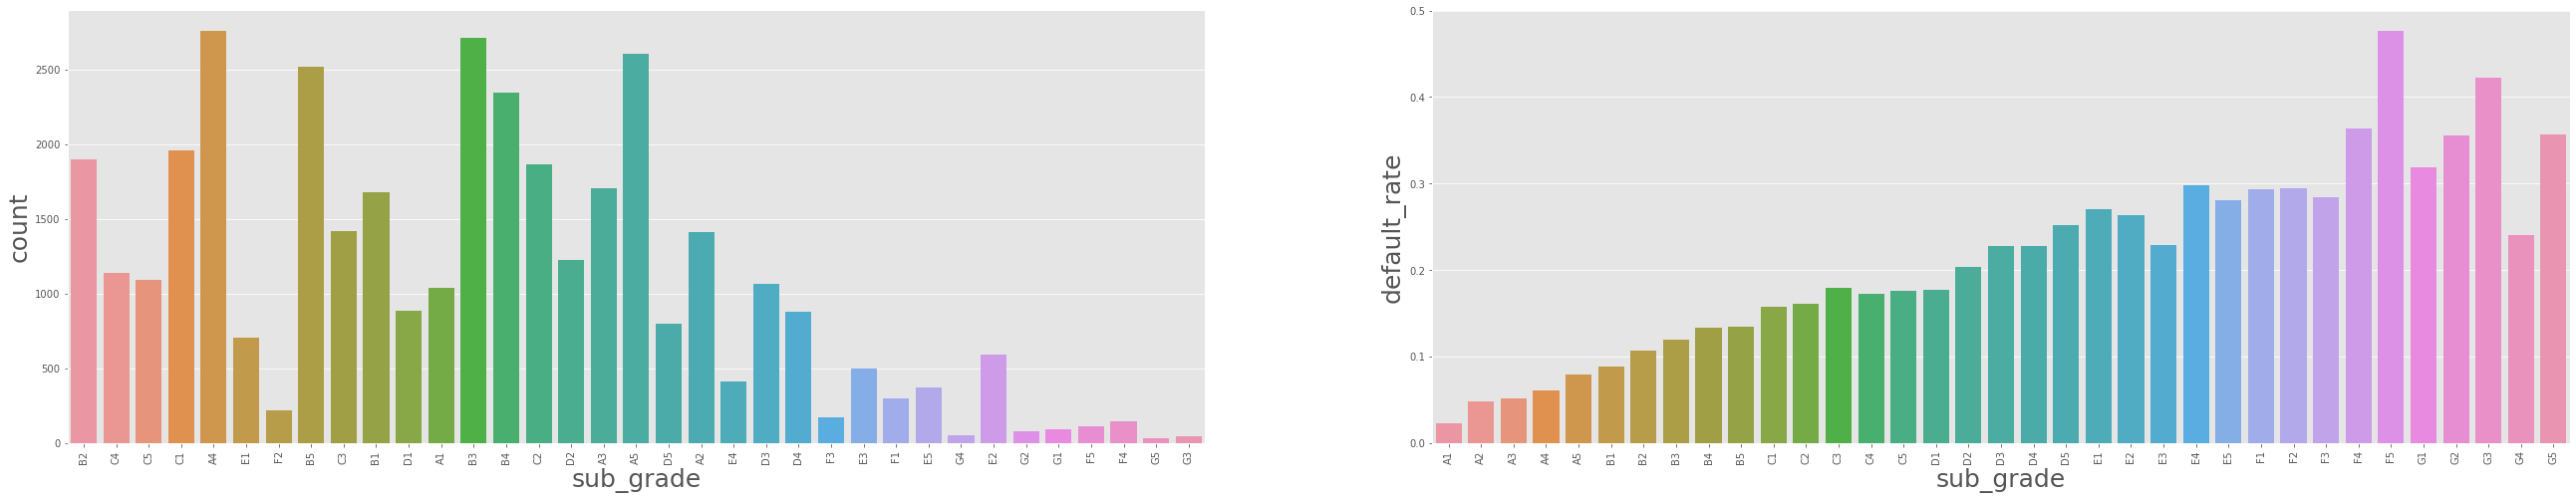

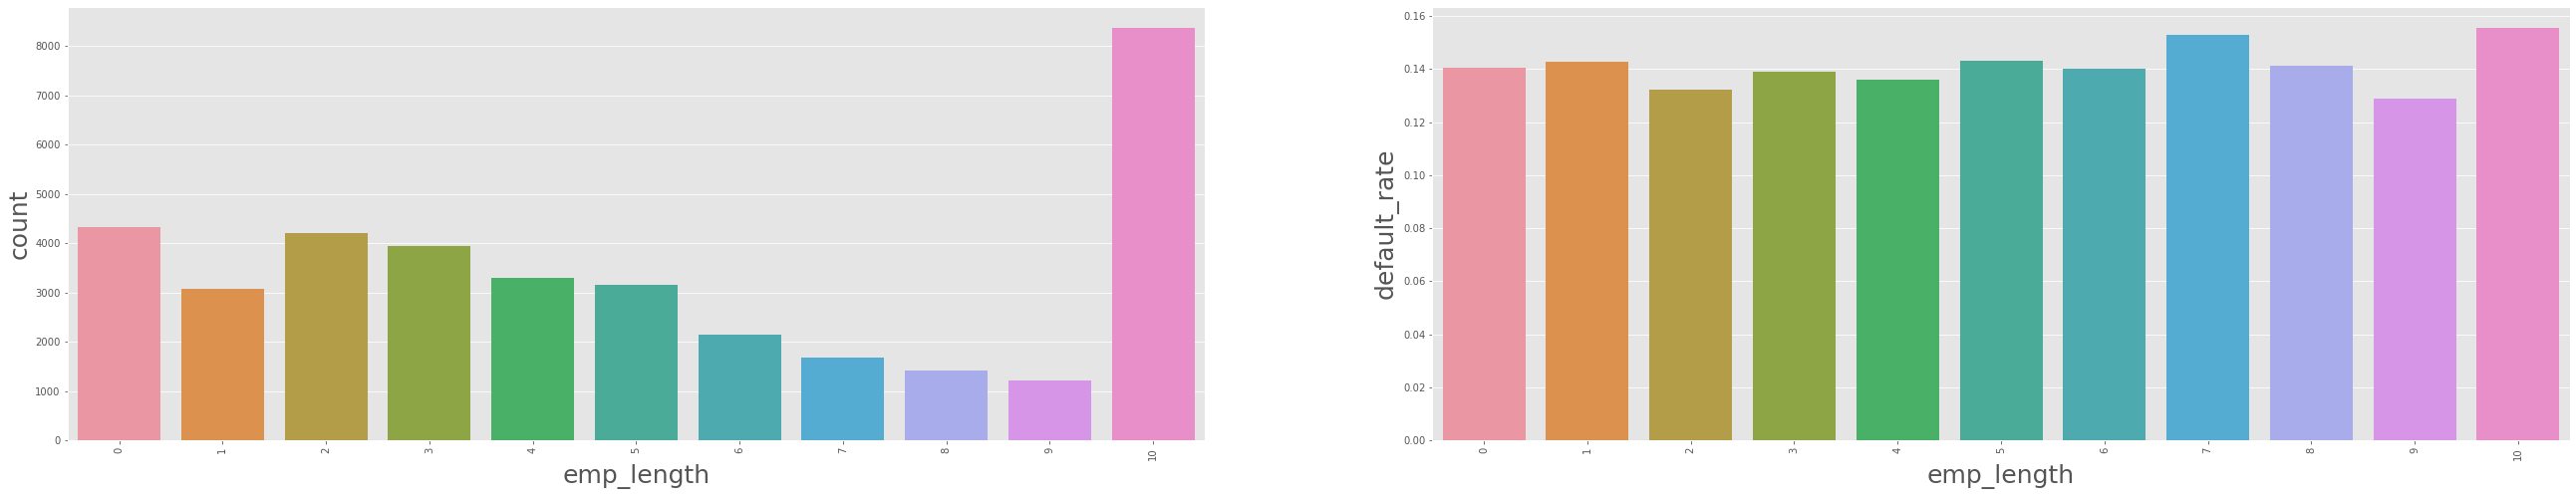

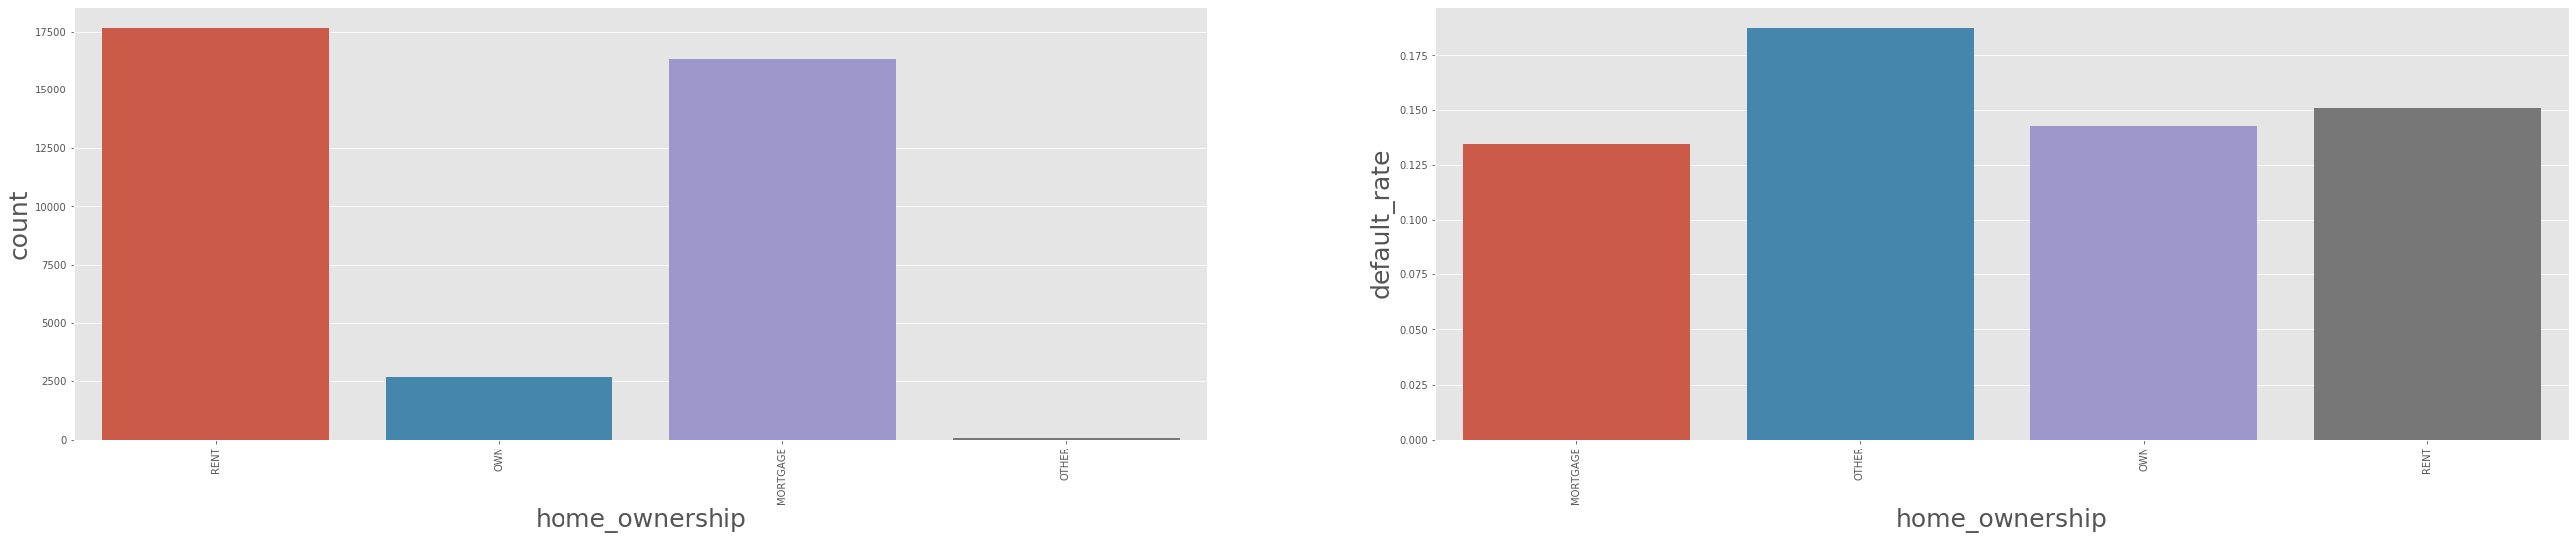

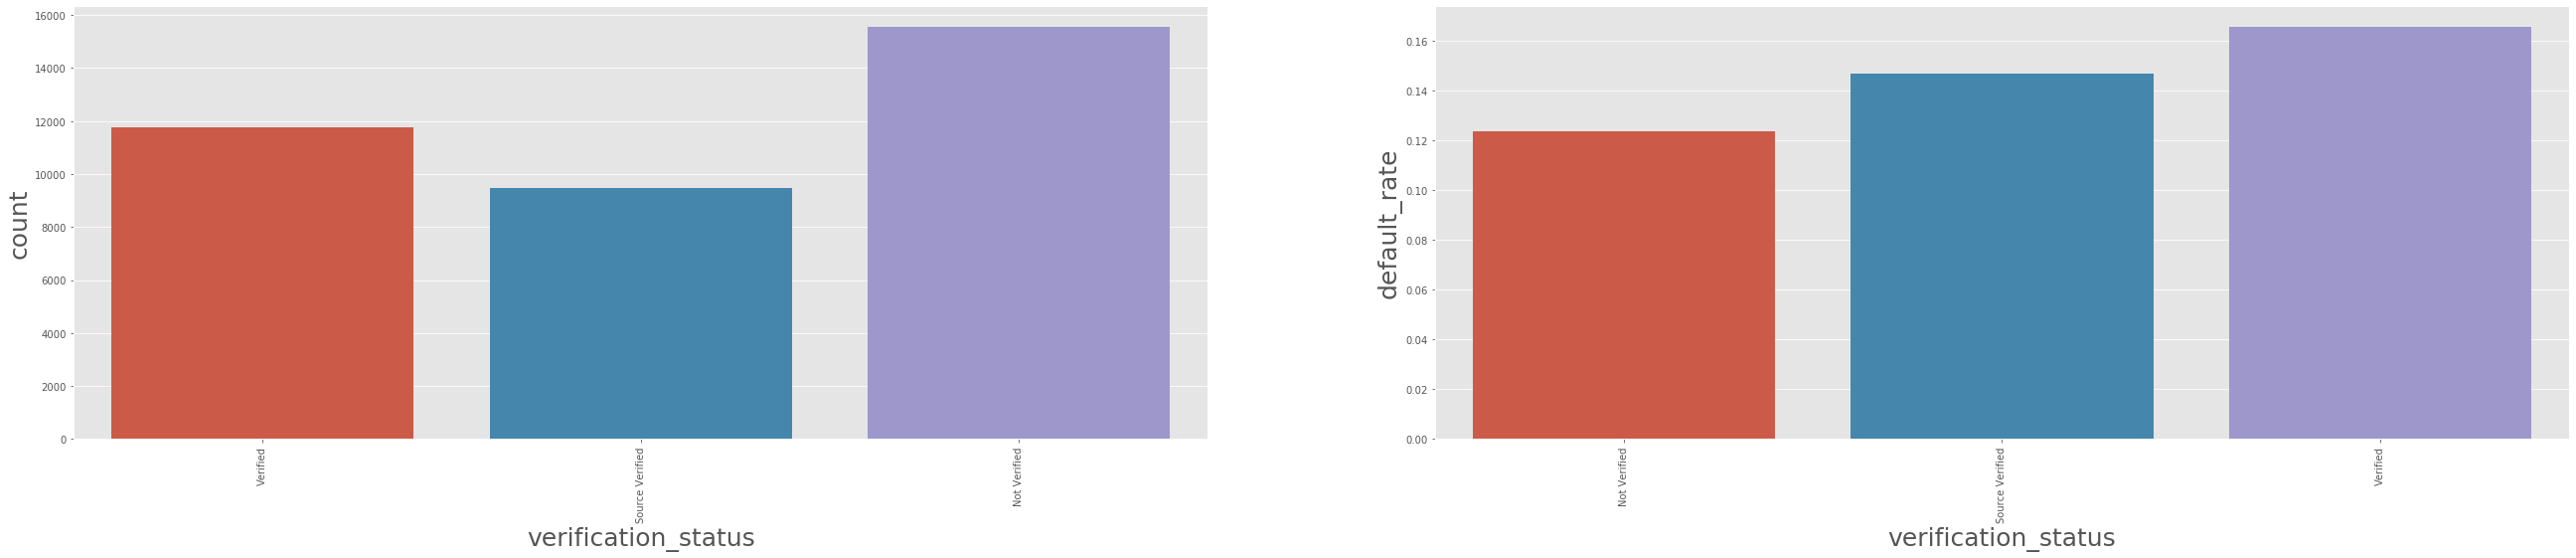

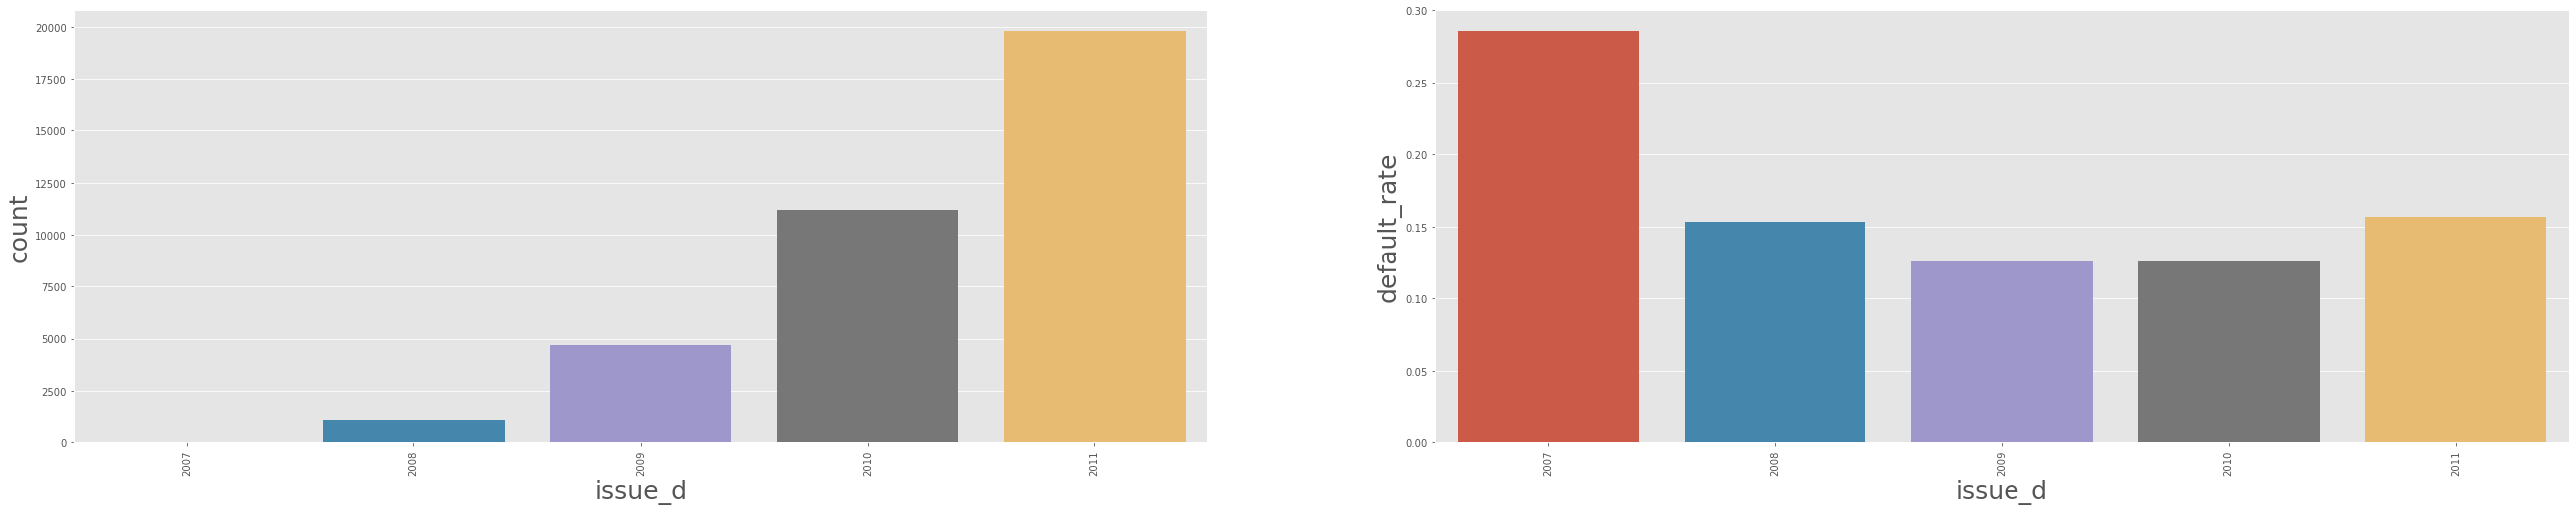

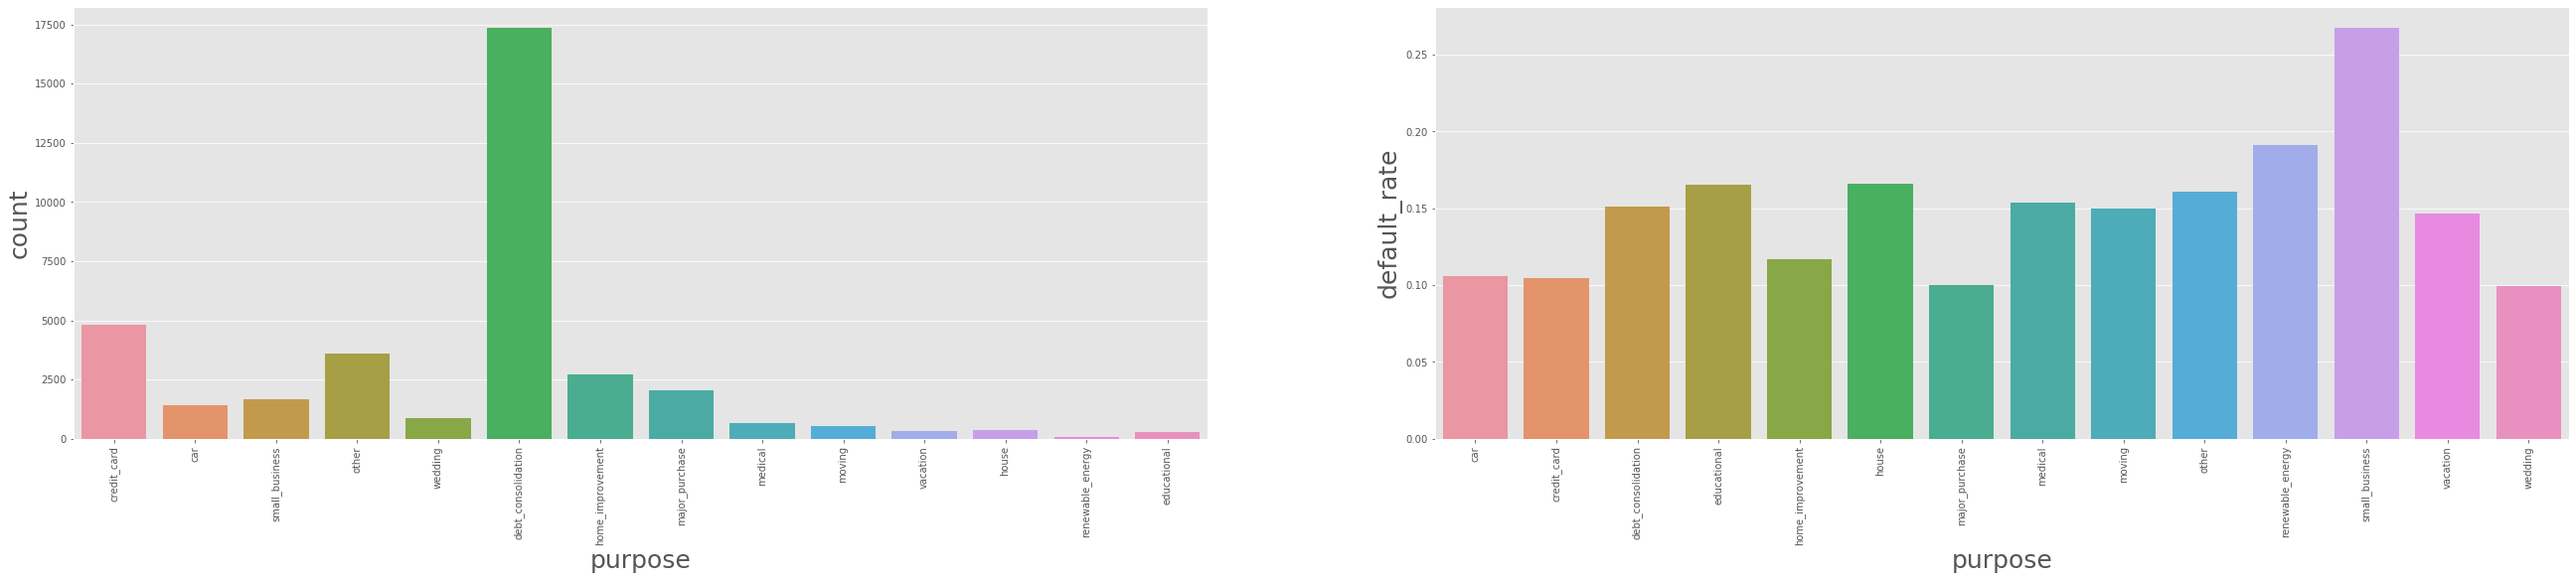

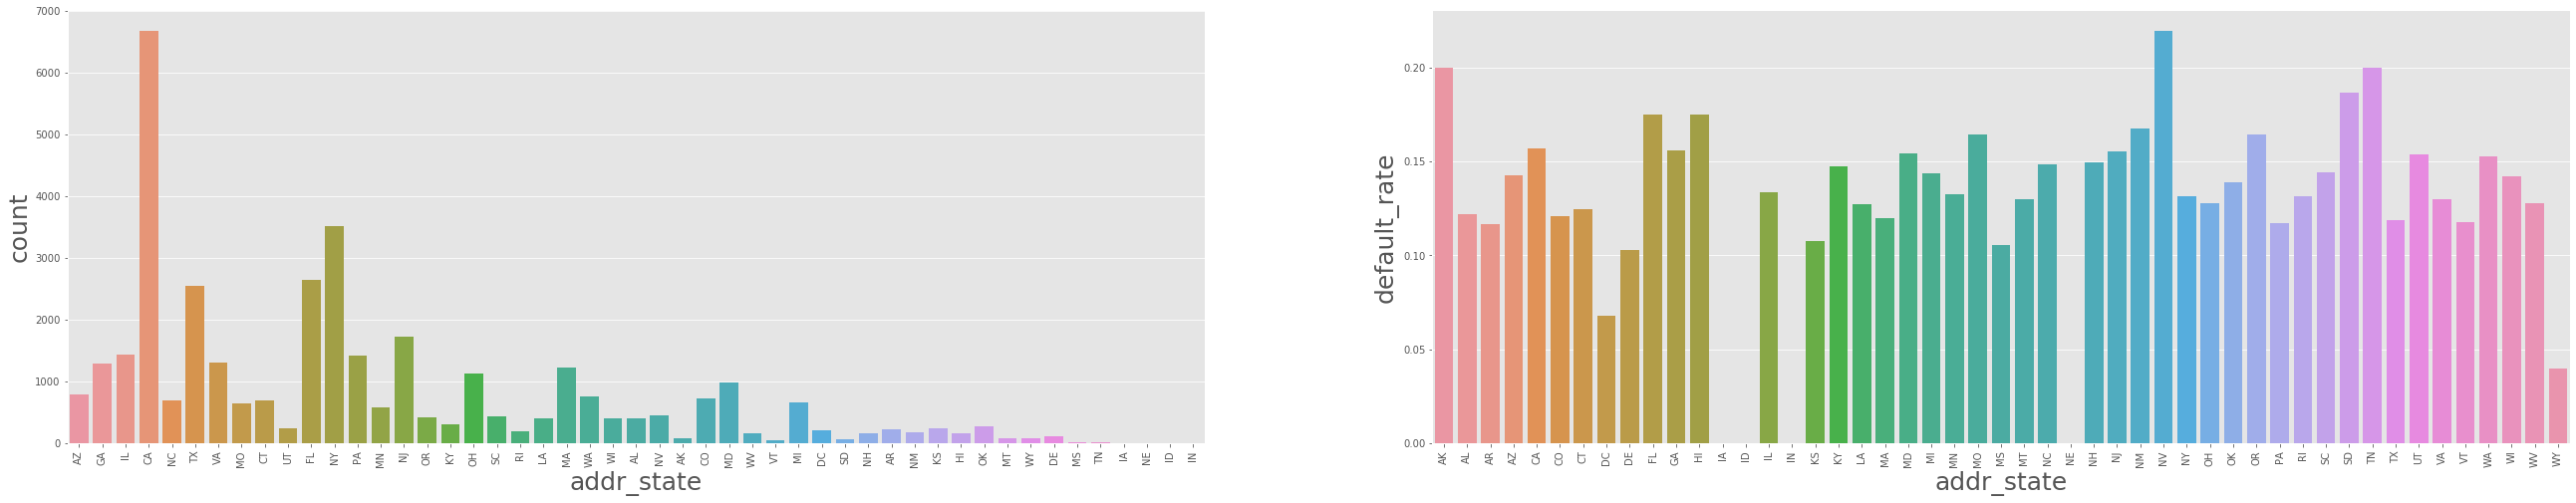

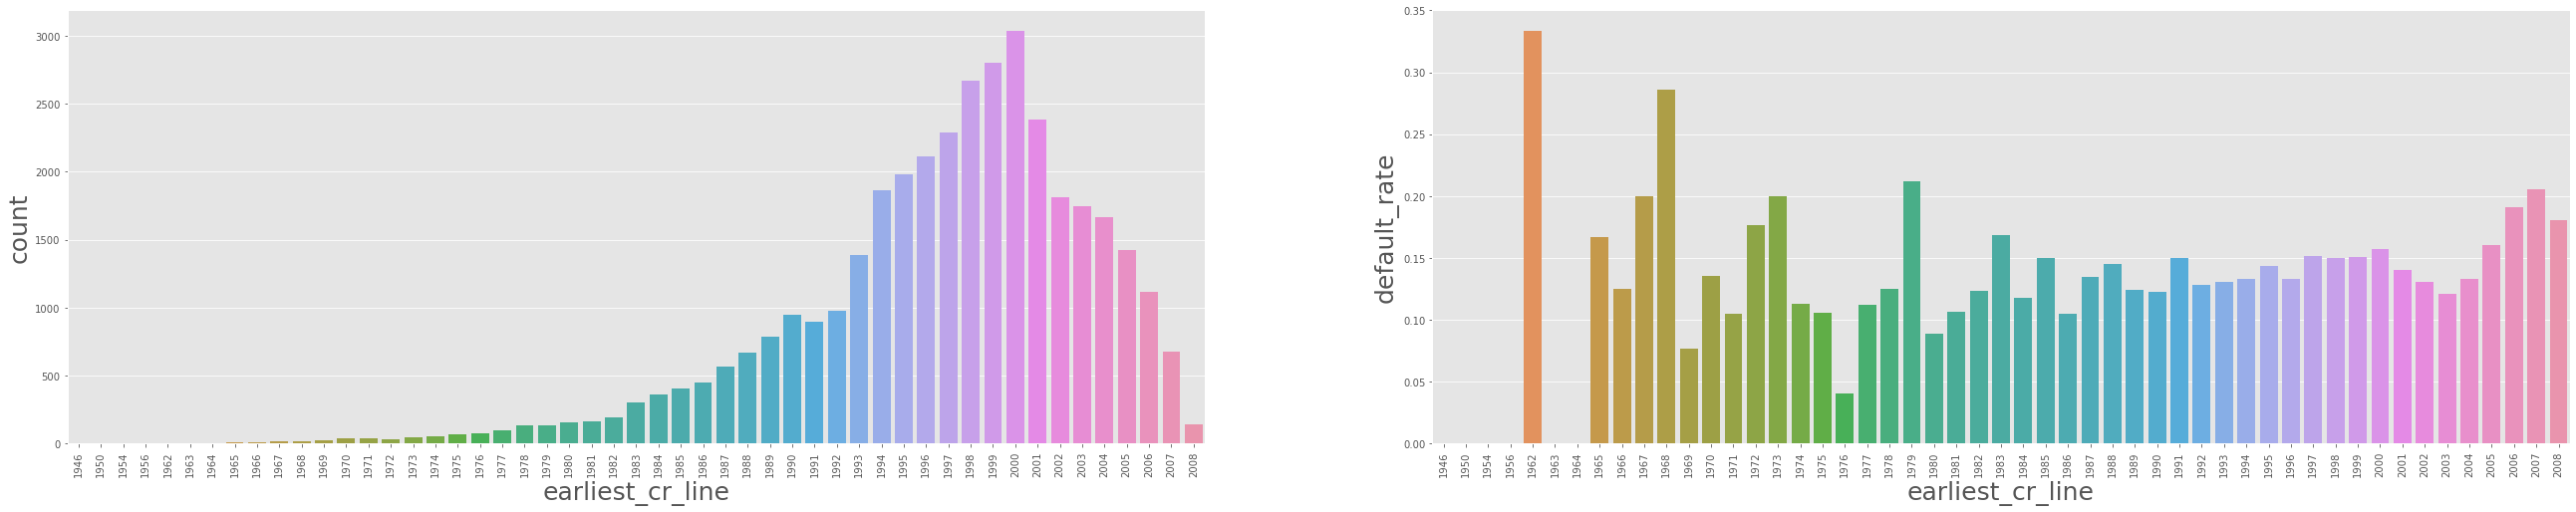

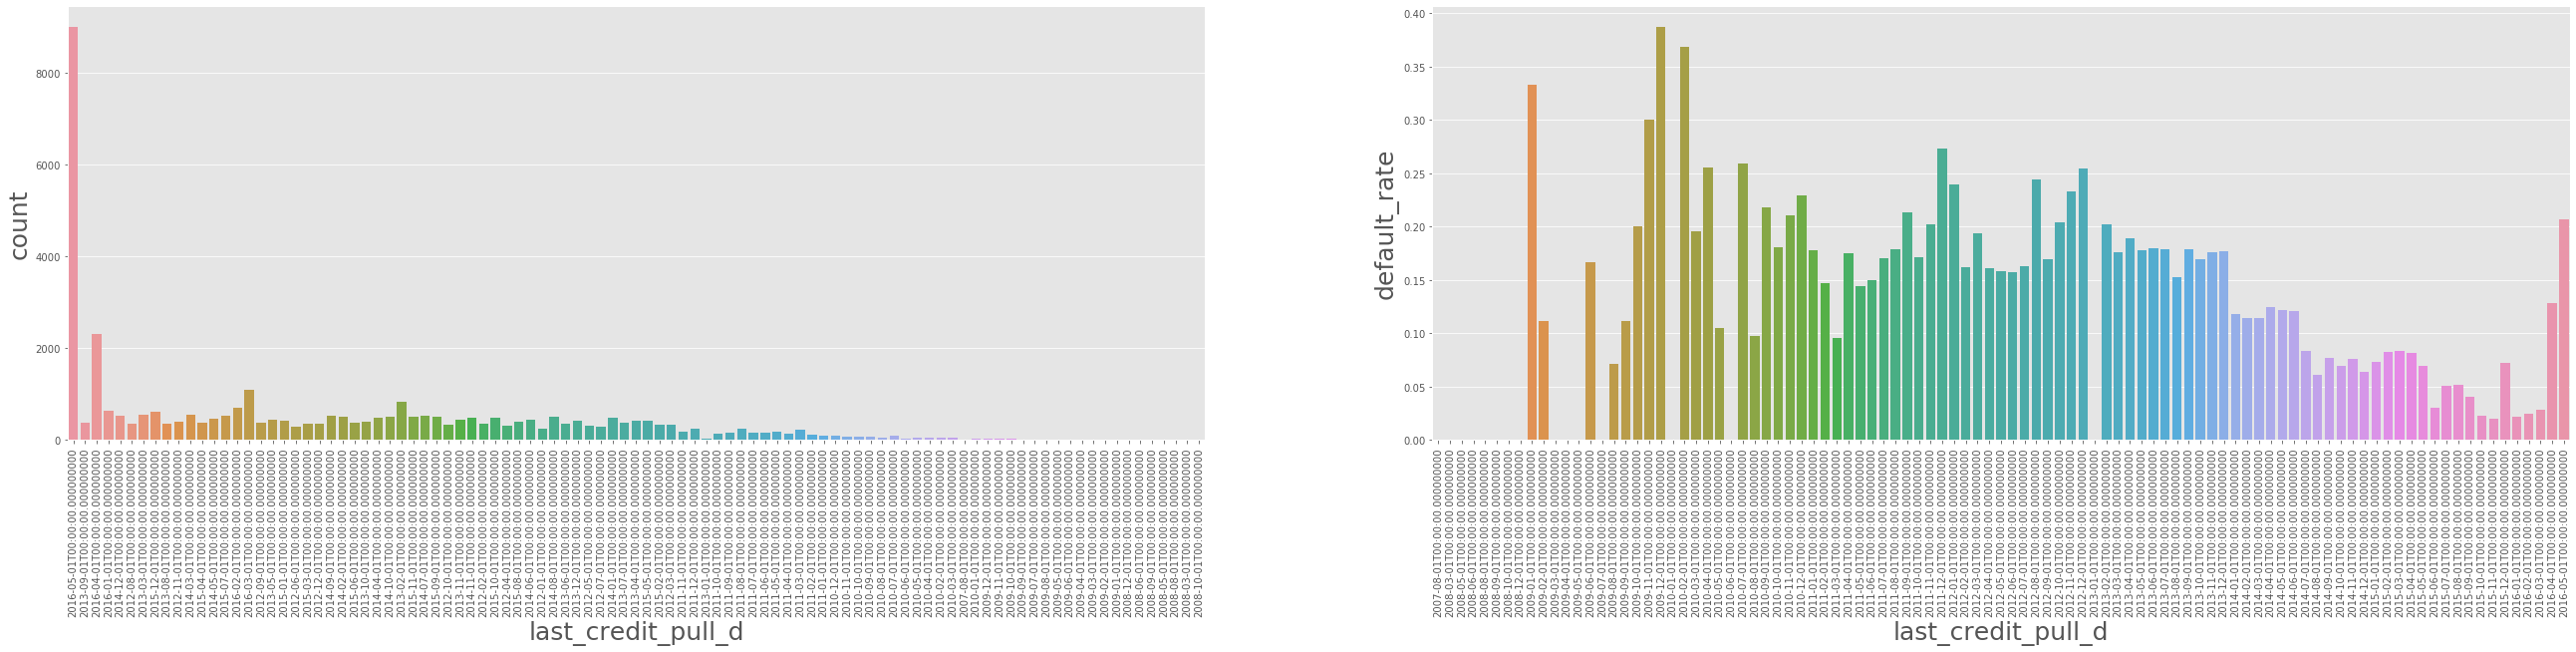

In [97]:
for cat_var in dtype_obj:
    if cat_var=='loan_status':
        continue
    fig, ax = plt.subplots(1, 2, figsize=(45,8))
    for ind, subplot in zip(range(2), ax.flatten()):
        if ind==0:
            a = sns.countplot(data = loan_data,x=cat_var,ax=subplot)
            a.set_ylabel('count',fontsize=25)
            a.set_xlabel(cat_var,fontsize=25)
        else:
            masala = pd.DataFrame(count_plot_util2(loan_data,cat_var)).reset_index()
            b = sns.barplot(data = masala,x=cat_var,y='loan_status')
            b.set_ylabel('default_rate',fontsize=25)
            b.set_xlabel(cat_var,fontsize=25)
        for label in subplot.get_xticklabels():
            label.set_rotation(90)

In [98]:
len(dtype_obj)

13

### Observations here ...

## 4. Bivariate Analysis

In [100]:
loan_data.shape

(36799, 25)

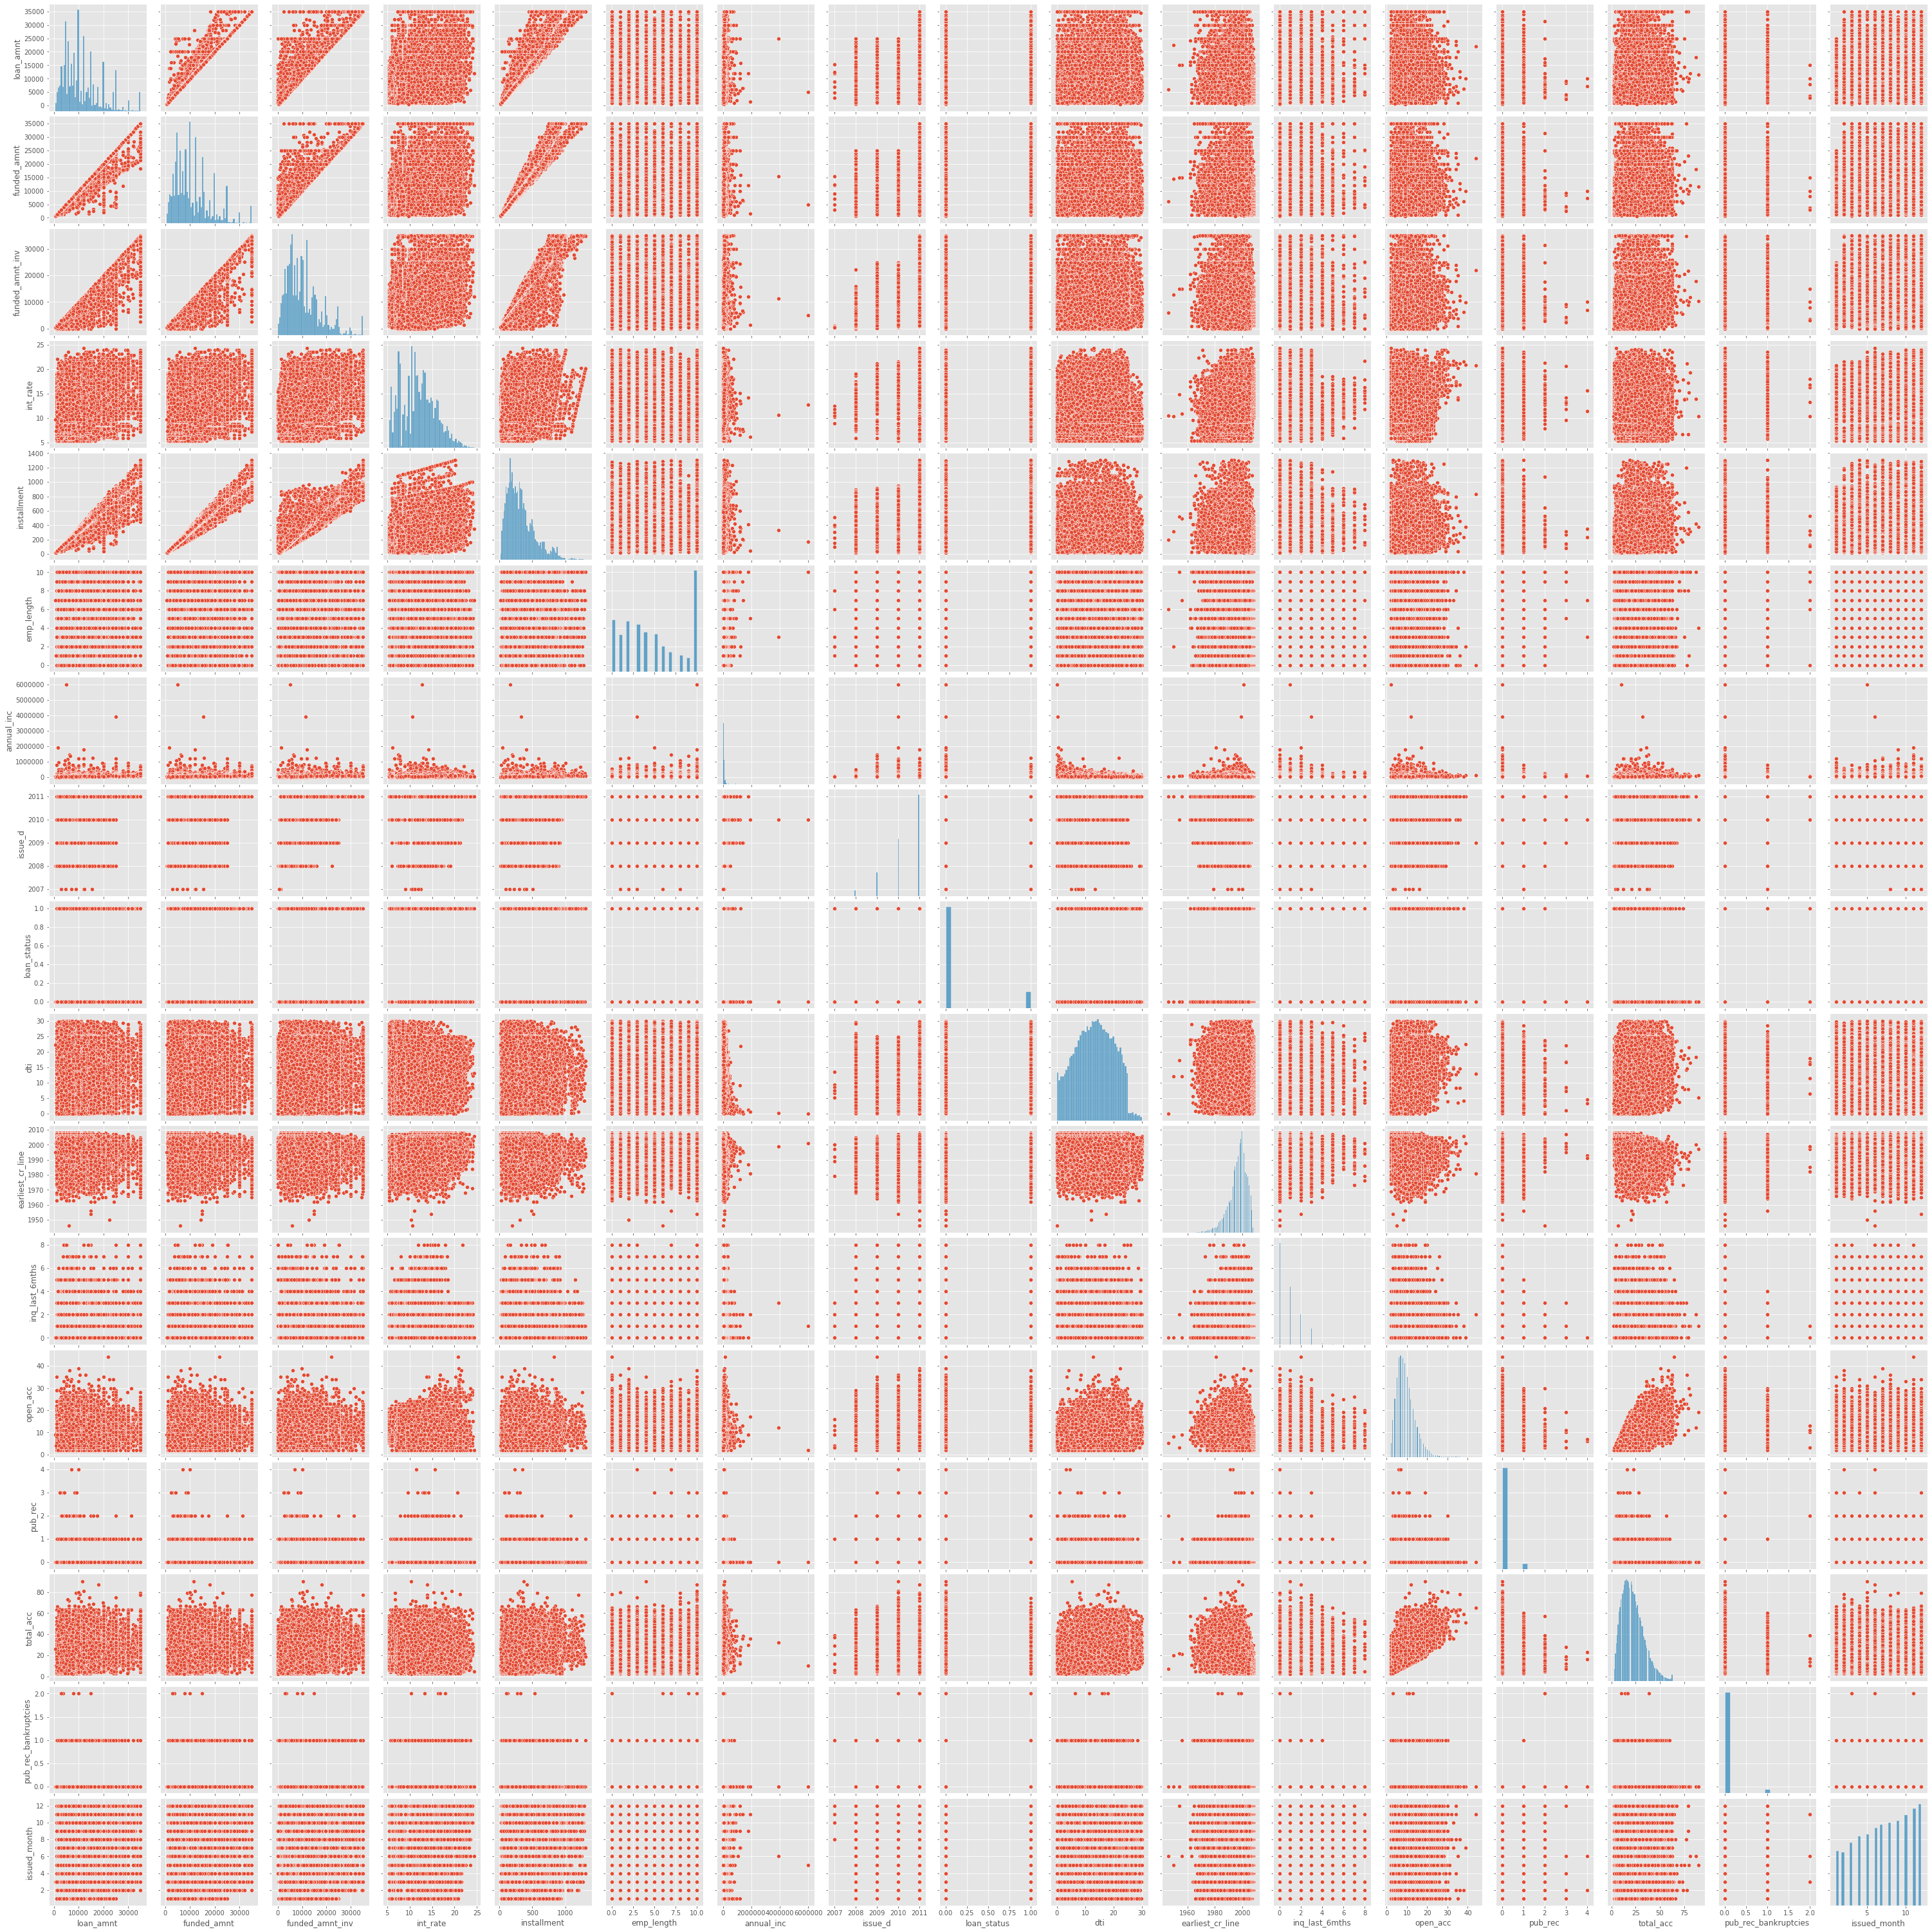

In [99]:
sns.pairplot(loan_data)

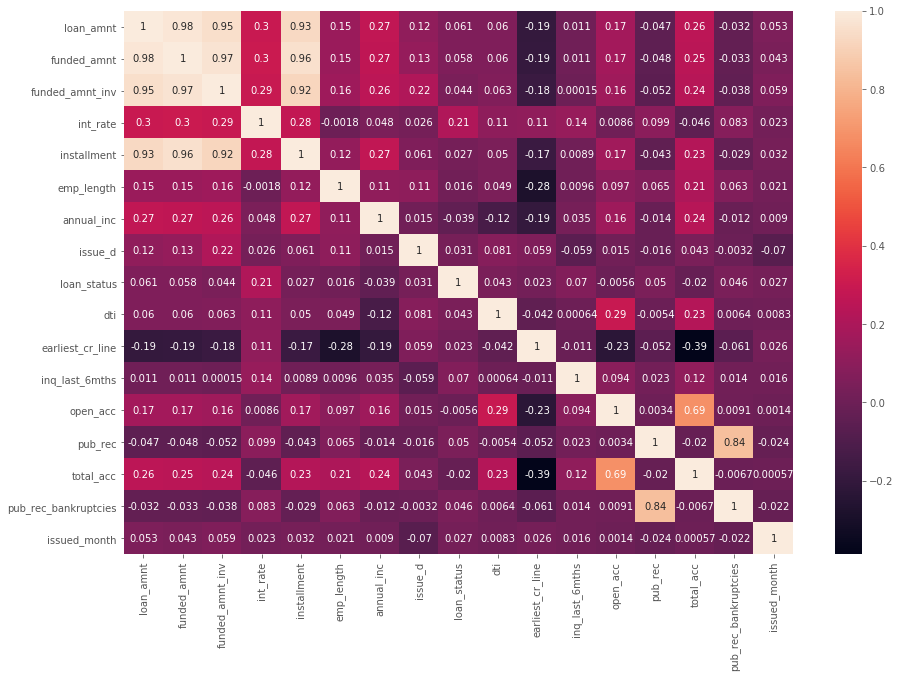

In [103]:
plt.figure(figsize=(15,10))
sns.heatmap(loan_data.corr(),annot=True)

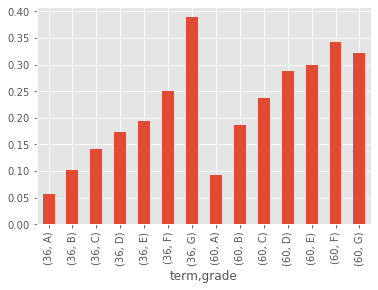

In [111]:
count_plot_util2(loan_data,['term','grade']).plot.bar()

('term', 'int_rate')


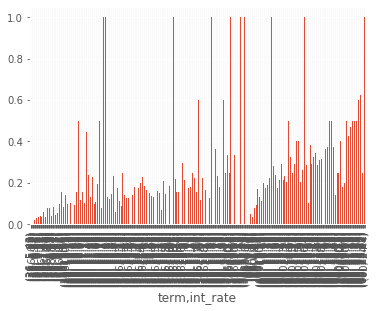

('term', 'grade')


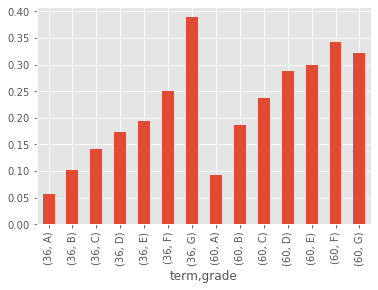

('term', 'sub_grade')


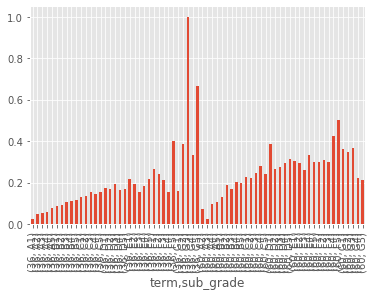

('term', 'emp_length')


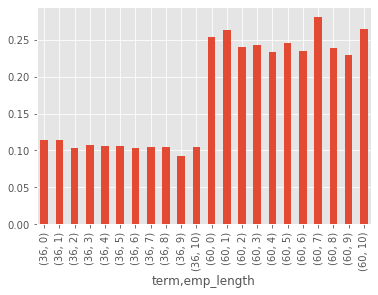

('term', 'home_ownership')


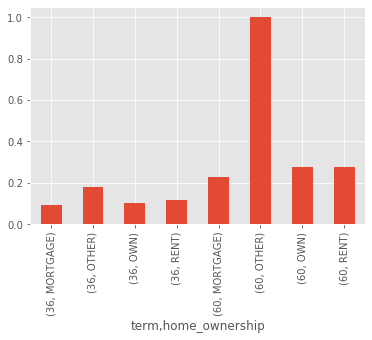

('term', 'verification_status')


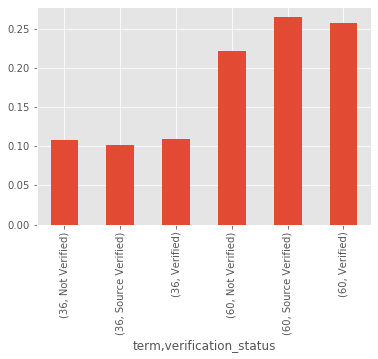

In [117]:
count = 0
for c in combinations(dtype_obj,2):
    print(c)
    count_plot_util2(loan_data,[c[0],c[1]]).plot.bar()
    plt.show()
    count += 1
    if count > 5:
        break

#### Observations here